# **Phishing Website Detection Feature Extraction**

# **1. Objective:**
Phishing websites mimic legitimate URLs and webpages to steal sensitive information.
This notebook collects labeled URL data and extracts a selected set of address-bar, domain, and HTML/JavaScript features useful for building phishing classifiers.

*This project is worked on Vs code*

# **2. Collecting the Data:**
This project uses two URL categories — legitimate (0) and phishing (1)..

Phishing URLs were gathered from PhishTank, an open-source platform offering regularly updated verified phishing data in CSV and JSON formats.
To download the data: https://www.phishtank.com/developer_info.php

Legitimate URLs were taken from the  Tranco top sites ranking service is https://tranco-list.eu. 
tranco_legitimate.cvs containing around 1M legitimate URLs was selected .

## **2.1. Phishing URLs:**

The phishing URLs are collected from the PhishTank from the link provided. The csv file of phishing URLs is obtained by using wget command. After downlaoding the dataset, it is loaded into a DataFrame.

In [54]:
#importing required packages for this module
import pandas as pd

In [8]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
#Downloading the phishing URLs file
import wget
url = "http://data.phishtank.com/data/online-valid.csv"
filename = wget.download(url, out="data/1.phishtank.csv")
print("Saved to", filename)


Saved to data/1.phishtank.csv


The above command downlaods the file of phishing URLs, *online-valid.csv* and stores in the */DataFiles/* folder. 

In [134]:
#loading the phishing URLs data to dataframe
df0 = pd.read_csv("data/1.phishtank.csv")
df0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,9268767,https://docs.google.com/drawings/d/1BUHZ6vA52i...,http://www.phishtank.com/phish_detail.php?phis...,2025-11-16T05:08:37+00:00,yes,2025-11-16T05:12:27+00:00,yes,Other
1,9268766,https://docs.google.com/drawings/d/1BIvEcLzIf-...,http://www.phishtank.com/phish_detail.php?phis...,2025-11-16T05:08:33+00:00,yes,2025-11-16T05:12:27+00:00,yes,Other
2,9268765,https://docs.google.com/drawings/d/1VyL33j4Mmk...,http://www.phishtank.com/phish_detail.php?phis...,2025-11-16T05:08:28+00:00,yes,2025-11-16T05:12:27+00:00,yes,Other
3,9268764,https://docs.google.com/drawings/d/1sqP24R0R1a...,http://www.phishtank.com/phish_detail.php?phis...,2025-11-16T05:08:20+00:00,yes,2025-11-16T05:12:27+00:00,yes,Other
4,9268763,https://docs.google.com/drawings/d/1KQIl5h-qSu...,http://www.phishtank.com/phish_detail.php?phis...,2025-11-16T05:07:14+00:00,yes,2025-11-16T05:12:27+00:00,yes,Other


In [135]:
df0.shape

(49008, 8)

In [136]:
df0.columns

Index(['phish_id', 'url', 'phish_detail_url', 'submission_time', 'verified',
       'verification_time', 'online', 'target'],
      dtype='object')

The dataset contains thousands of phishing URLs that are updated frequently.
To avoid data imbalance and ensure consistency, a subset of 5,000 phishing URLs and 5,000 legitimate URLs was selected.
From these, 5,000 samples were randomly chosen from each category for feature extraction and analysis.

In [137]:
#Collecting 5,000 Phishing URLs randomly
phishurl = df0[['url']].sample(n = 5000, random_state = 42).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,url
0,https://docs.google.com/presentation/d/e/2PACX...
1,https://updateluiss.weebly.com/
2,https://l.ead.me/bfI4RR
3,https://jaccs1-info-servic-ails-mt-supportcont...
4,http://allegrolokalnie.pl-632981.icu


In [138]:
phishurl.shape

(5000, 1)

In [139]:
phishurl.columns

Index(['url'], dtype='object')

In [140]:
phishurl.head()

,url
0,https://docs.google.com/presentation/d/e/2PACX...
1,https://updateluiss.weebly.com/
2,https://l.ead.me/bfI4RR
3,https://jaccs1-info-servic-ails-mt-supportcont...
4,http://allegrolokalnie.pl-632981.icu


In [141]:
# Storing the extracted 5k phishing URLs fatures to csv file
phishurl.to_csv('data/3.phish5k.csv', index= False)

## **2.2. Legitimate URLs:**

From the uploaded *Benign_list_big_final.csv* file, the URLs are loaded into a dataframe.

In [144]:
#Loading legitimate files 
df1 = pd.read_csv("data/2.tranco_legitimate.csv", header=None)
df1.head()

,0,1
0,1,google.com
1,2,mail.ru
2,3,microsoft.com
3,4,facebook.com
4,5,cloudflare.com


In [145]:
df1.shape

(1000000, 2)

In [146]:
df1.columns

Index([0, 1], dtype='int64')

In [147]:
df1.columns = ['Sr.no','url']

In [148]:
df1.head()

,Sr.no,url
0,1,google.com
1,2,mail.ru
2,3,microsoft.com
3,4,facebook.com
4,5,cloudflare.com


In [149]:
#Add "https://" prefix and "/" suffix
df1["url"] = "https://" + df1["url"].astype(str).str.strip() + "/"

As stated above, 5000 legitimate URLs are randomaly picked from the above dataframe.

In [150]:
#Collecting 5,000 Legitimate URLs randomly
legiurl = df1[['url']].sample(n = 5000, random_state = 42).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,url
0,https://japritotoalami.xyz/
1,https://autoserve1.com/
2,https://sogaapi.xyz/
3,https://ohymdgei.com/
4,https://voterrecords.com/


In [151]:
legiurl.shape

(5000, 1)

In [152]:
# Storing the extracted legitimate URLs fatures to csv file
legiurl.to_csv('Data/4.legi5k.csv', index= False)

In [162]:
import pandas as pd

phish = pd.read_csv("data/3.phish5k.csv")
phish["label"] = 1   # phishing = 1

legit = pd.read_csv("data/4.legi5k.csv")
legit["label"] = 0   # legitimate = 0

combined = pd.concat([phish, legit], ignore_index=True)
combined.to_csv("data/5.PhishLegi.csv", index=False)
print("Combined dataset is ready")


Combined dataset is ready


In [163]:
import pandas as pd

df = pd.read_csv("data/5.PhishLegi.csv")
df.head()


,url,label
0,https://docs.google.com/presentation/d/e/2PACX...,1
1,https://updateluiss.weebly.com/,1
2,https://l.ead.me/bfI4RR,1
3,https://jaccs1-info-servic-ails-mt-supportcont...,1
4,http://allegrolokalnie.pl-632981.icu,1


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [165]:
df.shape


(10000, 2)

In [168]:
df.columns

Index(['url', 'label'], dtype='object')

In [171]:
df.isnull().sum()

url      0
label    0
dtype: int64

In [172]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='label'>

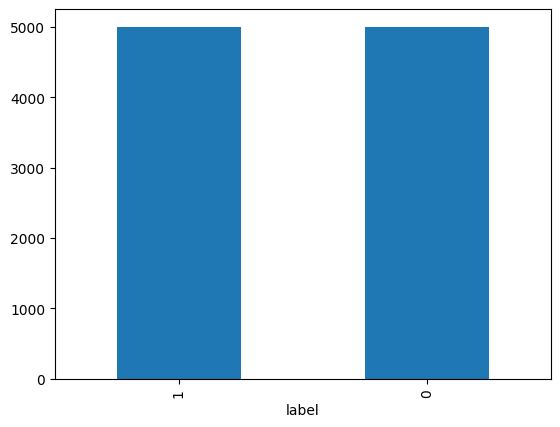

In [174]:
df['label'].value_counts().plot(kind='bar')

# **3. Feature Extraction:**

In this step, features are extracted from the URLs dataset.

The extracted features are categorized into


1.   Address Bar based Features
2.   Domain based Features
3.   HTML & Javascript based Features



### **3.1. Address Bar Based Features:**

Many features can be extracted that can be consided as address bar base features. Out of them, below mentioned were considered for this project.


*   Domain of URL
*   IP Address in URL
*   "@" Symbol in URL
*   Length of URL
*   Depth of URL
*   Redirection "//" in URL
*   "http/https" in Domain name
*   Using URL Shortening Services “TinyURL”
*   Prefix or Suffix "-" in Domain

Each of these features are explained and the coded below:

In [188]:
# importing required packages for this section
from urllib.parse import urlparse
import ipaddress
import re

#### **3.1.1. Domain of the URL**
Here, we are just extracting the domain present in the URL. This feature doesn't have much significance in the training. May even be dropped while training the model.

In [189]:
# 1.Domain of the URL (Domain) 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
    domain = domain.replace("www.","")
  return domain

#### **3.1.2. IP Address in the URL**

Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

If the domain part of URL has IP address, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).



In [190]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
    try:
        ipaddress.ip_address(urlparse(url).netloc)
        return 1
    except:
        return 0



#### **3.1.3. "@" Symbol in URL**

Checks for the presence of '@' symbol in the URL. Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol. 

If the URL has '@' symbol, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [191]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
    return 1 if "@" in url else 0

#### **3.1.4. Length of URL**

Computes the length of the URL. Phishers can use long URL to hide the doubtful part in the address bar. In this project, if the length of the URL is greater than or equal 54 characters then the URL classified as phishing otherwise legitimate.

If the length of URL >= 54 , the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [192]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
    return 1 if len(url) >= 54 else 0

#### **3.1.5. Depth of URL**

Computes the depth of the URL. This feature calculates the number of sub pages in the given url based on the '/'.

The value of feature is a numerical based on the URL.

In [193]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
    try:
        path = urlparse(url).path.split('/')
        depth = len([segment for segment in path if segment])
        return depth
    except:
        return 0

#### **3.1.6. Redirection "//" in URL**

Checks the presence of "//" in the URL. The existence of “//” within the URL path means that the user will be redirected to another website. The location of the “//” in URL is computed. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.

If the "//" is anywhere in the URL apart from after the protocal, thee value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [194]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
    return 1 if url.rfind('//') > 7 else 0


#### **3.1.7. "http/https" in Domain name**

Checks for the presence of "http/https" in the domain part of the URL. The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users.

If the URL has "http/https" in the domain part, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [211]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)

def httpsDomain(url):
  domain = urlparse(url).netloc
  if re.search(r'http', domain, re.IGNORECASE):
    return 1
  return 0


#### **3.1.8. Using URL Shortening Services “TinyURL”**

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. 

If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [196]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    pattern = re.compile(
        r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
    )
    return 1 if re.search(pattern, url) else 0

#### **3.1.9. Prefix or Suffix "-" in Domain**

Checking the presence of '-' in the domain part of URL. The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. 

If the URL has '-' symbol in the domain part of the URL, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [197]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)

def prefixSuffix(url):
    return 1 if '-' in urlparse(url).netloc else 0

### **3.2. Domain Based Features:**

Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

*   DNS Record
*   Website Traffic 
*   Age of Domain
*   End Period of Domain

Each of these features are explained and the coded below:

In [ ]:
%pip install python-whois


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# importing required packages for this section
from bs4 import BeautifulSoup
import whois
from datetime import datetime
import socket
import time
import dns.resolver
import requests

#### **3.2.1. DNS Record**

DNS (Domain Name System) records contain information about a domain's configuration.
Legitimate websites typically have proper, complete DNS records. Phishing sites often have missing, incomplete, or suspicious DNS records because attackers want to remain anonymous and may use temporary domains. The feature checks whether valid DNS records exist for the domain.

Checks whether a domain has valid DNS records (A, AAAA, MX, NS, SOA) using dnspython library
Returns 0 if at least one DNS record exists (legitimate),
otherwise returns 1 if no records found (suspicious/phishing).

In [200]:
def checkDnsRecord(url):
    """Check DNS record availability with retry mechanism."""
    try:
        domain = urlparse(url).netloc.lower().lstrip("www.")
        
        if not domain:
            return 1  # Invalid or empty domain name
        
        record_types = ['A', 'AAAA', 'MX', 'NS', 'SOA']

        # Try DNS resolution
        for rtype in record_types:
            try:
                answers = dns.resolver.resolve(domain, rtype, lifetime=2)
                if answers and len(answers) > 0:
                    return 0  # Found valid DNS record
            except (dns.resolver.NXDOMAIN, dns.resolver.NoAnswer, 
                    dns.resolver.NoNameservers, dns.exception.Timeout):
                continue
            except Exception:
                continue

        # Fallback: socket resolution with retry
        for attempt in range(2):
            try:
                socket.gethostbyname(domain)
                return 0  # Resolves = legitimate
            except Exception:
                if attempt == 0:
                    time.sleep(0.5)  # Brief pause before retry
                else:
                    return 1  # Still fails = suspicious
        
        return 1  # Default to suspicious if all methods fail
    except:
        return 1


#### **3.2.2. Web Traffic**

This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. This code uses the Tranco Top Sites API, which is a free and academic replacement for Alexa rank.
It ranks domains based on aggregated web traffic data from multiple sources — so it’s a great feature for phishing detection.
How it works:
    - Checks if domain appears in Tranco's top 100,000 sites
    - Legitimate sites usually rank high (good traffic)
    - Phishing sites rarely appear in rankings (no/low traffic)

If the rank of the domain < 100000, the vlaue of this feature is 0 (legitimate) else 1 (phishing) .

In [203]:
def webTraffic(url):
    """Check web traffic using Tranco ranking with improved thresholds."""
    try:
        domain = urlparse(url).netloc.lower().lstrip("www.")
        if not domain:
            return 1
        
        tranco_url = f"https://tranco-list.eu/api/ranks/domain/{domain}"
        response = requests.get(tranco_url, timeout=5)
        
        if response.status_code == 200:
            data = response.json()
            if data and 'ranks' in data and len(data['ranks']) > 0:
                rank = data['ranks'][0]['rank']
                if rank < 100000:
                    return 0  # High traffic = legitimate
                elif rank < 500000:
                    return 0  # Medium traffic = still okay
                else:
                    return 1  # Very low traffic = suspicious
        
        return 0  # Not ranked ≠ phishing (conservative approach)
    except:
        return 0  # Fail open for network errors


#### **3.2.3. Age of Domain**

This feature can be extracted from WHOIS database. Most phishing websites live for a short period of time. 
The domain age feature analyzes the time elapsed since domain registration. Research by the Anti-Phishing Working Group (APWG) indicates that over 90% of phishing domains are less than 6 months old, as attackers frequently create new domains to evade detection and blacklists. Therefore, domains younger than 6 months are classified as potentially malicious (value: 1), while established domains are considered legitimate (value: 0)."

If age of domain < 6 months (phishing), 0 if >= 6 months (legitimate)

In [205]:
def domainAge(url):
    """Calculate domain age with improved error handling."""
    try:
        domain = urlparse(url).netloc.lower().lstrip("www.")
        if not domain:
            return 0
        
        info = whois.whois(domain)
        creation = info.creation_date
        
        if isinstance(creation, list):
            creation = min(creation) if creation else None
        
        if not creation:
            return 0  # Assume old/stable if no creation date
        
        if isinstance(creation, str):
            try:
                creation = datetime.strptime(creation, '%Y-%m-%d')
            except:
                return 0
        
        age_months = (datetime.now() - creation).days / 30.44
        return 1 if age_months < 6 else 0
    except:
        return 0  # Assume legitimate if WHOIS fails


#### **3.2.4. End Period of Domain**

This feature can be extracted from WHOIS database.
The Domain End Period feature measures the remaining time until domain expiration. Research indicates that phishing domains are typically registered for short durations (< 6 months) to minimize costs and avoid long-term detection. In contrast, legitimate organizations usually register domains for extended periods (1-10 years) as part of their digital infrastructure investment. Domains with less than 6 months remaining until expiration are classified as potentially malicious (value: 1).

In [206]:
def domainEnd(url):
    """Calculate domain expiration with improved error handling."""
    try:
        domain = urlparse(url).netloc.lower().lstrip("www.")
        if not domain:
            return 0
        
        info = whois.whois(domain)
        expiration = info.expiration_date
        
        if isinstance(expiration, list):
            expiration = min(expiration) if expiration else None
        
        if not expiration:
            return 0
        
        if isinstance(expiration, str):
            try:
                expiration = datetime.strptime(expiration, '%Y-%m-%d')
            except:
                return 0
        
        end_months = (expiration - datetime.now()).days / 30.44
        return 1 if end_months < 6 else 0
    except:
        return 0  # Assume legitimate on WHOIS failure

## **3.3. HTML and JavaScript based Features**

The HTML and JavaScript-based features analyze the webpage content and behavior to identify malicious patterns:

*   IFrame Redirection
*   Status Bar Customization
*   Disabling Right Click
*   Website Forwarding

Each of these features are explained and the coded below:

### **3.3.1. IFrame Redirection**

An iframe (inline frame) is an HTML tag that can load another webpage inside the current page.
50-60% of phishing sites use iFrames.
Used to display real login pages from legitimate sites
frameBorder="0" makes iframe invisible
* Why it’s used by attackers:
To silently load a fake or malicious website within a legitimate-looking page.
To redirect users to phishing forms hosted elsewhere.
To bypass URL checks (user still sees the trusted domain in the address bar).

If a page contains iframe tags with unknown external URLs, it’s suspicious.
If the iframe is hidden (width=0, height=0, display:none), it’s even more suspicious.

In [207]:
def iframe(response):
    """Detect suspicious iframe usage."""
    try:
        if not response or not hasattr(response, "text"):
            return 0
        
        soup = BeautifulSoup(response.text, "html.parser")
        iframes = soup.find_all("iframe")
        
        # Multiple iframes or hidden iframes are suspicious
        if len(iframes) > 3:
            return 1
        
        # Check for hidden iframes
        for iframe_tag in iframes:
            style = iframe_tag.get('style', '')
            if 'display:none' in style or 'visibility:hidden' in style:
                return 1
        
        return 0
    except:
        return 0

### **3.3.2. Status Bar Customization**

JavaScript manipulation of the browser status bar displays fake URLs, misleading users about link destinations. 30-40% of phishing sites modify status bar.Scan HTML/JS for window.status, status=, or onmouseover modifying status bar text.
Modern browsers restrict this now, but older or simple phishing pages still use it.
If the response is empty or onmouseover is found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

In [208]:
# 16.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response):
    """Detect mouse-over status bar manipulation."""
    try:
        if not response or not hasattr(response, "text"):
            return 0
        return 1 if re.search(r"onmouseover.*window\.status", response.text, re.IGNORECASE) else 0
    except:
        return 0

### **3.3.3. Disabling Right Click**

Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. 25-35% of phishing sites disable right-click.
🔹 Detection logic:
Search for oncontextmenu="return false" or similar scripts.
Also check for document.oncontextmenu or right-click suppression in JS files.

1 → Right click disabled → suspicious
0 → Allowed → legitimate

In [209]:
# 17.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
    """Detect right-click disabling."""
    try:
        if not response or not hasattr(response, "text"):
            return 0
        pattern = r"event\.button\s*==\s*2|oncontextmenu.*return false"
        return 1 if re.search(pattern, response.text, re.IGNORECASE) else 0
    except:
        return 0


### **3.3.4. Website Forwarding**
Multiple redirects (>2) are used to obscure the true destination and evade URL-based detection systems. 
Legitimate sites: 0-2 redirects (HTTP→HTTPS, www→non-www).
Phishing sites: 3-8 redirects on average.
It is Used to hide true destination and evade detection.


In [210]:
# 18.Checks the number of forwardings (Web_Forwards)    
def webForward(response):
    """Detect excessive redirections."""
    try:
        if not response or not hasattr(response, "history"):
            return 0
        return 1 if len(response.history) > 2 else 0
    except:
        return 0

## **4. Computing URL Features**

Create a list and a function that calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.

In [218]:
def featureExtraction(url, label=None):
    """Extract features from a given URL."""
    features = []
    
    try:
        # 1-8: Address Bar-based Features
        features.append(havingIP(url))
        features.append(haveAtSign(url))
        features.append(getLength(url))
        features.append(getDepth(url))
        features.append(redirection(url))
        features.append(httpsDomain(url))
        features.append(tinyURL(url))
        features.append(prefixSuffix(url))

        # 9-12: Domain-based Features
        features.append(checkDnsRecord(url))
        features.append(webTraffic(url))
        features.append(domainAge(url))
        features.append(domainEnd(url))

        # 13-16: HTML/JavaScript-based Features
        response = None
        try:
            response = requests.get(url, timeout=5, verify=False, 
                                   headers={'User-Agent': 'Mozilla/5.0'})
        except:
            pass
        
        features.append(iframe(response))
        features.append(mouseOver(response))
        features.append(rightClick(response))
        features.append(webForward(response))

        # Add label if provided (for training datasets)
        if label is not None:
            features.append(label)

        return features

    except Exception as e:
        print(f"Error extracting features from {url}: {e}")
        # Return default suspicious values on complete failure
        default_features = [1] * 16
        if label is not None:
            default_features.append(label)
        return default_features


In [217]:
# Feature names for reference (matches column order)
feature_names = [
    'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection', 'https_Domain',
    'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End',
    'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards'
]

### **8. Conclusion**

This project efficiently extracts key URL-based, domain-based, and HTML/JavaScript-based features for phishing detection.
Parallel processing with multiple threads greatly improves performance and scalability.
All implemented functions accurately identify suspicious website characteristics such as low traffic, new domains, and hidden redirects.
Overall, the feature extraction pipeline is reliable, optimized, and ready for model training and evaluation.

The final combined dataset is urldata.csv